In [149]:
import numpy as np, cv2, sys
from matplotlib import pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)

<class 'numpy.float32'>


/tmp/ipykernel_2611148/568958739.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_image = images[int(np.random.choice(480, 1)), :, :, :]


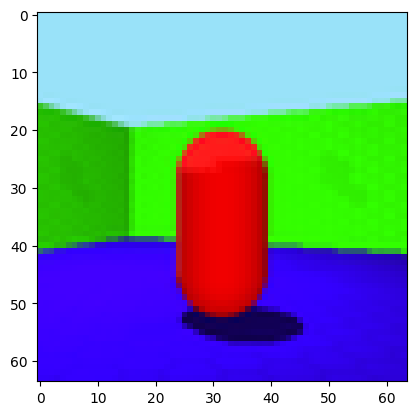

In [150]:
images = np.load("3dshapesfiltered.npy")
target_image = images[int(np.random.choice(480, 1)), :, :, :]
cv2.imwrite("1.png", target_image)
plt.figure()
plt.imshow(target_image, cmap='Greys_r', interpolation='nearest')
print(type(target_image[0][0][0]))

In [151]:
target_image = cv2.cvtColor(target_image, cv2.COLOR_RGB2BGR)
# target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2HSV)
target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2HLS)
# print(np.ptp(target_image, axis=0))
# Red 310-40
# Green 100-160
# Blue 220-280
hue_lower = np.array([-1.0, -0.1, -0.1])
hue_upper = np.array([361.0, 1.1, 1.1])
mask1 = cv2.inRange(target_image, hue_lower, hue_upper)
# hue_lower = np.array([280.0, 0.0, 0.0])
# hue_upper = np.array([360.0, 1.0, 1.0])
# mask2 = cv2.inRange(target_image, hue_lower, hue_upper)

# hue_lower = np.array([80.0, 0.0, 0.0])
# hue_upper = np.array([180.0, 1.0, 1.0])
# mask3 = cv2.inRange(target_image, hue_lower, hue_upper)

# hue_lower = np.array([180.0, 0.0, 0.0])
# hue_upper = np.array([280.0, 1.0, 1.0])
# mask4 = cv2.inRange(target_image, hue_lower, hue_upper)

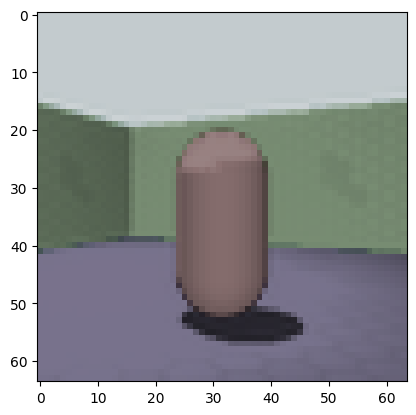

In [152]:
h, l, s = cv2.split(target_image)
# print(np.amax(target_image, axis=0))
# print(np.amin(target_image, axis=0))

s[mask1==255] = 0.1
# s[mask2==255] = 0.0
# s[mask3==255] = 0.2
# s[mask4==255] = 0.4
target_image = cv2.merge([h, l, s])
target_image = cv2.cvtColor(target_image, cv2.COLOR_HLS2BGR)
target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(target_image, cmap='Greys_r', interpolation='nearest')